# **BBC News Classification**

-------

Name: Naufal Prima Yoriko <br/>
Email: primayoriko@gmail.com <br/>

# **A. Import Data**

In [27]:
# import data
!wget --no-check-certificate https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv -O ./bbc-text.csv

--2021-06-16 06:57:45--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 64.233.170.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘./bbc-text.csv’

./bbc-text.csv      100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2021-06-16 06:57:45 (216 MB/s) - ‘./bbc-text.csv’ saved [5057493/5057493]



In [28]:
!ls

bbc-text.csv  sample_data


In [29]:
# Load data
import pandas as pd

df = pd.read_csv('bbc-text.csv')

# **B. Data Description**

In [30]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [31]:
df.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,ultimate game award for doom 3 sci-fi shooter...
freq,511,2


In [32]:
df.shape

(2225, 2)

# **C. Data Preprocess**

## **1. Filter blank or null text**

In [33]:
filter = df["text"] != ""
df = df[filter]
df = df.dropna()

In [34]:
df.shape

(2225, 2)

In [35]:
X = df["text"]
y = df["category"]

## **2. Lowering case of the text**

In [36]:
X.apply(lambda el: el.lower())

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object

## **3. Tokenize with punctuations removal of the text**

In [37]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
X.apply(lambda el: tokenizer.tokenize(el))

0       [tv, future, in, the, hands, of, viewers, with...
1       [worldcom, boss, left, books, alone, former, w...
2       [tigers, wary, of, farrell, gamble, leicester,...
3       [yeading, face, newcastle, in, fa, cup, premie...
4       [ocean, s, twelve, raids, box, office, ocean, ...
                              ...                        
2220    [cars, pull, down, us, retail, figures, us, re...
2221    [kilroy, unveils, immigration, policy, ex, cha...
2222    [rem, announce, new, glasgow, concert, us, ban...
2223    [how, political, squabbles, snowball, it, s, b...
2224    [souness, delight, at, euro, progress, boss, g...
Name: text, Length: 2225, dtype: object

## **4. Remove all stop words**

In [38]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords 
  
stop_words = set(stopwords.words('english')) 

def remove_stop_words(words, stop_words):
  filtered_sentence = []
  for w in words:
      if w not in stop_words:
          filtered_sentence.append(w)
  return filtered_sentence

X.apply(lambda el: remove_stop_words(el, stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [v,  , f, u, u, r, e,  , n,  , h, e,  , h, n, ...
1       [w, r, l, c,  , b,  ,  , l, e, f,  , b, k,  , ...
2       [g, e, r,  , w, r,  , f,  , f, r, r, e, l, l, ...
3       [e, n, g,  , f, c, e,  , n, e, w, c, l, e,  , ...
4       [c, e, n,  ,  , w, e, l, v, e,  , r,  , b, x, ...
                              ...                        
2220    [c, r,  , p, u, l, l,  , w, n,  , u,  , r, e, ...
2221    [k, l, r,  , u, n, v, e, l,  , g, r, n,  , p, ...
2222    [r, e,  , n, n, u, n, c, e,  , n, e, w,  , g, ...
2223    [h, w,  , p, l, c, l,  , q, u, b, b, l, e,  , ...
2224    [u, n, e,  , e, l, g, h,  ,  , e, u, r,  , p, ...
Name: text, Length: 2225, dtype: object

In [39]:
X.head()

0    tv future in the hands of viewers with home th...
1    worldcom boss  left books alone  former worldc...
2    tigers wary of farrell  gamble  leicester say ...
3    yeading face newcastle in fa cup premiership s...
4    ocean s twelve raids box office ocean s twelve...
Name: text, dtype: object

## **5. Lemmatize word in the text**

In [40]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(words):
  lemmatized_sentence = []
 
  for word in words:
    lemmatized_sentence.append(wordnet_lemmatizer.lemmatize(word))

  return lemmatized_sentence

X.apply(lambda el: lemmatize(el))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       [t, v,  , f, u, t, u, r, e,  , i, n,  , t, h, ...
1       [w, o, r, l, d, c, o, m,  , b, o, s, s,  ,  , ...
2       [t, i, g, e, r, s,  , w, a, r, y,  , o, f,  , ...
3       [y, e, a, d, i, n, g,  , f, a, c, e,  , n, e, ...
4       [o, c, e, a, n,  , s,  , t, w, e, l, v, e,  , ...
                              ...                        
2220    [c, a, r, s,  , p, u, l, l,  , d, o, w, n,  , ...
2221    [k, i, l, r, o, y,  , u, n, v, e, i, l, s,  , ...
2222    [r, e, m,  , a, n, n, o, u, n, c, e,  , n, e, ...
2223    [h, o, w,  , p, o, l, i, t, i, c, a, l,  , s, ...
2224    [s, o, u, n, e, s, s,  , d, e, l, i, g, h, t, ...
Name: text, Length: 2225, dtype: object

In [41]:
X.head()

0    tv future in the hands of viewers with home th...
1    worldcom boss  left books alone  former worldc...
2    tigers wary of farrell  gamble  leicester say ...
3    yeading face newcastle in fa cup premiership s...
4    ocean s twelve raids box office ocean s twelve...
Name: text, dtype: object

# **D. Process data**

## **1. Convert NLTK token with sklearn token**

In [42]:
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X.apply(lambda el: " ".join(el))

X = X.values

X = np.array(X, dtype='O')
  
tokenizer = Tokenizer(num_words=5000, oov_token='oov')
tokenizer.fit_on_texts(X) 
  
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=600, padding='post', truncating='post')

In [43]:
print(X[0])

[ 177  265    7    2 1253    4 1316   18  127 1217  839    1  163 1169
 4340    5  236  273 4202 1441   77    2 1408 1686    2  118   48 1045
  177   24   17    1  423    7  173   80   68   11   10  229    3   35
 3208 1427   36 2600   22    2  677  517 1374  150    7 3043 3126    3
 1844  131  183   49  992   24  853   51    4  126 1050    1   18    2
   50  753    2 1669 1148    5   72  512   24   17 2086    3 1316  876
  127  602  180 1590 2199 1743  224    5  428  210 2825    3  915    1
    5 1183  708   51    4    2  117 4484   53  992    4 2661   20   39
  236    5  448  273 4202    1    5    1  183  113  151 3297   93    2
   50    8    1    5    2   78    8 1493  234  554   48    3  227 1494
  160 4666    5  588    1  177 1148   67   30  165    1    2  161 2200
    9  141   41    1  177   30   26   46   89 1218    7    3  163 1169
  177 2057   36   26  237  248    7  518    5    2   50   25 2959    3
  115  129    7  238  103    4    2 1317    4  163 1169 4485   29   86
   56 

In [44]:
# y = pd.get_dummies(y)
y = np.array(pd.get_dummies(y).values, dtype='O')

In [45]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

print(X[0])
print(y[0])

[ 177  265    7    2 1253    4 1316   18  127 1217  839    1  163 1169
 4340    5  236  273 4202 1441   77    2 1408 1686    2  118   48 1045
  177   24   17    1  423    7  173   80   68   11   10  229    3   35
 3208 1427   36 2600   22    2  677  517 1374  150    7 3043 3126    3
 1844  131  183   49  992   24  853   51    4  126 1050    1   18    2
   50  753    2 1669 1148    5   72  512   24   17 2086    3 1316  876
  127  602  180 1590 2199 1743  224    5  428  210 2825    3  915    1
    5 1183  708   51    4    2  117 4484   53  992    4 2661   20   39
  236    5  448  273 4202    1    5    1  183  113  151 3297   93    2
   50    8    1    5    2   78    8 1493  234  554   48    3  227 1494
  160 4666    5  588    1  177 1148   67   30  165    1    2  161 2200
    9  141   41    1  177   30   26   46   89 1218    7    3  163 1169
  177 2057   36   26  237  248    7  518    5    2   50   25 2959    3
  115  129    7  238  103    4    2 1317    4  163 1169 4485   29   86
   56 

In [46]:
X_train_tensor = tf.convert_to_tensor(
    X_train, dtype=tf.int32
)

X_test_tensor = tf.convert_to_tensor(
    X_test, dtype=tf.int32
)

y_train_tensor = tf.convert_to_tensor(
    y_train, dtype=tf.bool
)

y_test_tensor = tf.convert_to_tensor(
    y_test, dtype=tf.bool
)

## **2. Create ANN model**

In [72]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.Bidirectional(LSTM(64)),
    # tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          80000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               41472     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 325       
Total params: 146,565
Trainable params: 146,565
Non-trainable params: 0
_________________________________________________________________


In [73]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

## **3. Train model with data**

In [68]:
num_epochs = 15
history = model.fit(X_train_tensor, y_train_tensor, epochs=num_epochs, 
                    validation_data=(X_test_tensor, y_test_tensor), verbose=2)

Epoch 1/15
56/56 - 36s - loss: 1.5890 - accuracy: 0.2562 - val_loss: 1.4181 - val_accuracy: 0.4427
Epoch 2/15
56/56 - 33s - loss: 1.1569 - accuracy: 0.5118 - val_loss: 0.8701 - val_accuracy: 0.6674
Epoch 3/15
56/56 - 32s - loss: 0.5809 - accuracy: 0.8146 - val_loss: 0.5650 - val_accuracy: 0.8382
Epoch 4/15
56/56 - 32s - loss: 0.1878 - accuracy: 0.9567 - val_loss: 0.3505 - val_accuracy: 0.8944
Epoch 5/15
56/56 - 32s - loss: 0.0334 - accuracy: 0.9944 - val_loss: 0.4087 - val_accuracy: 0.8899
Epoch 6/15
56/56 - 32s - loss: 0.0080 - accuracy: 0.9994 - val_loss: 0.3815 - val_accuracy: 0.9124
Epoch 7/15
56/56 - 32s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3962 - val_accuracy: 0.9124
Epoch 8/15
56/56 - 31s - loss: 8.7819e-04 - accuracy: 1.0000 - val_loss: 0.4119 - val_accuracy: 0.9101
Epoch 9/15
56/56 - 32s - loss: 5.6951e-04 - accuracy: 1.0000 - val_loss: 0.4246 - val_accuracy: 0.9079
Epoch 10/15
56/56 - 32s - loss: 4.0239e-04 - accuracy: 1.0000 - val_loss: 0.4395 - val_accuracy: 0.91

In [74]:
# try with callback 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

num_epochs = 12
history_callback = model.fit(
        X_train_tensor, y_train_tensor, 
        epochs=num_epochs, verbose=2,
        validation_data=(X_test_tensor, y_test_tensor), 
        callbacks=[
           EarlyStopping(patience=4, restore_best_weights=True),
           ReduceLROnPlateau(patience=3)
        ])

Epoch 1/12
56/56 - 130s - loss: 1.5891 - accuracy: 0.2629 - val_loss: 1.4970 - val_accuracy: 0.4427
Epoch 2/12
56/56 - 33s - loss: 1.0789 - accuracy: 0.5112 - val_loss: 0.8824 - val_accuracy: 0.6180
Epoch 3/12
56/56 - 33s - loss: 0.5317 - accuracy: 0.7994 - val_loss: 0.6469 - val_accuracy: 0.7461
Epoch 4/12
56/56 - 32s - loss: 0.2906 - accuracy: 0.9022 - val_loss: 0.5112 - val_accuracy: 0.8674
Epoch 5/12
56/56 - 33s - loss: 0.1222 - accuracy: 0.9669 - val_loss: 0.4708 - val_accuracy: 0.8876
Epoch 6/12
56/56 - 32s - loss: 0.0364 - accuracy: 0.9910 - val_loss: 0.5710 - val_accuracy: 0.8764
Epoch 7/12
56/56 - 33s - loss: 0.0203 - accuracy: 0.9921 - val_loss: 0.5733 - val_accuracy: 0.8989
Epoch 8/12
56/56 - 32s - loss: 0.0223 - accuracy: 0.9961 - val_loss: 0.6253 - val_accuracy: 0.9011
Epoch 9/12
56/56 - 32s - loss: 0.0079 - accuracy: 0.9983 - val_loss: 0.5987 - val_accuracy: 0.8966


## **4. Create graph of training process**

### **a. Without callback**

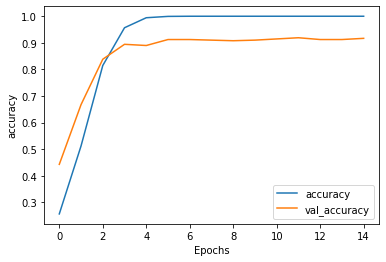

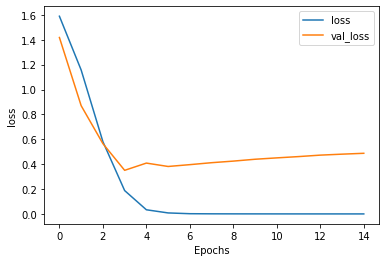

In [69]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### **b. With callback**

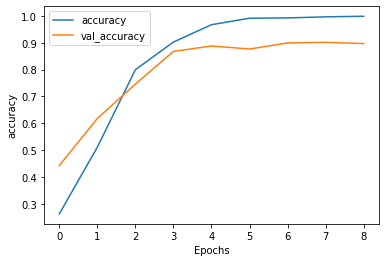

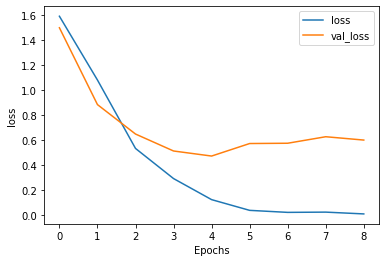

In [75]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_callback, "accuracy")
plot_graphs(history_callback, "loss")